## Analyse the World Indices Impact on Indian Indices

### 1. Get the required Data of World Indices

In [2]:
import numpy as np 
import yfinance as yf
import pandas as pd

In [9]:
#Symbols of important World indices

symbols=['^BSESN','^NSEI','^GSPC', '^DJI', '^IXIC', '^RUT','^BVSP',
         '^N225', '^HSI','^FTSE', '^STOXX50E','^GDAXI','^FCHI']

region= { 'India' : ['^BSESN','^NSEI'],
    'US & Canada' : [ '^IXIC','^GSPC','^DJI', '^RUT'],
  'Latin America' : ['^BVSP'],
  'East Asia' : ['^N225', '^HSI'],
  'Europe' : ['^FTSE', '^STOXX50E','^GDAXI','^FCHI']
}

### 2.Get the stock data for period 1-1-2020 to 31-1-2020

In [10]:
stock_list = []
for s in symbols: # iterate for every stock indices
    # Retrieve data from Yahoo! Finance
    tickerData = yf.Ticker(s)
    tickerDf1 = tickerData.history(period='1d', start='2020-1-1', end='2020-12-30')
    # Save historical data 
    tickerDf1['ticker'] = s # don't forget to specify the index
    stock_list.append(tickerDf1)
# Concatenate all data
msi = pd.concat(stock_list, axis = 0)

In [11]:
msi

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2020-01-02,41340.269531,41649.289062,41328.449219,41626.640625,5300,0,0,^BSESN
2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,8900,0,0,^BSESN
2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,8700,0,0,^BSESN
2020-01-07,40983.039062,41230.140625,40727.371094,40869.468750,11900,0,0,^BSESN
2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,18200,0,0,^BSESN
...,...,...,...,...,...,...,...,...
2020-12-22,5411.149902,5477.870117,5411.149902,5466.859863,0,0,0,^FCHI
2020-12-23,5472.140137,5539.160156,5472.029785,5527.589844,59208500,0,0,^FCHI
2020-12-24,5542.490234,5545.709961,5517.009766,5522.009766,0,0,0,^FCHI


In [14]:
#Add regions to the stock data 

def getRegion(ticker):
    for k in region.keys():
        if ticker in region[k]:
            return k
msi['region']= msi.ticker.apply(lambda x: getRegion(x))
msi

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,region
Date,,,,,,,,,
2020-01-02,41340.269531,41649.289062,41328.449219,41626.640625,5300,0,0,^BSESN,India
2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,8900,0,0,^BSESN,India
2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,8700,0,0,^BSESN,India
2020-01-07,40983.039062,41230.140625,40727.371094,40869.468750,11900,0,0,^BSESN,India
2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,18200,0,0,^BSESN,India
...,...,...,...,...,...,...,...,...,...
2020-12-22,5411.149902,5477.870117,5411.149902,5466.859863,0,0,0,^FCHI,Europe
2020-12-23,5472.140137,5539.160156,5472.029785,5527.589844,59208500,0,0,^FCHI,Europe
2020-12-24,5542.490234,5545.709961,5517.009766,5522.009766,0,0,0,^FCHI,Europe


In [76]:
data = msi[['ticker','Close', 'region']]
data

,ticker,Close,region
Date,,,
2020-01-02,^BSESN,41626.640625,India
2020-01-03,^BSESN,41464.609375,India
2020-01-06,^BSESN,40676.628906,India
2020-01-07,^BSESN,40869.468750,India
2020-01-08,^BSESN,40817.738281,India
...,...,...,...
2020-12-22,^FCHI,5466.859863,Europe
2020-12-23,^FCHI,5527.589844,Europe
2020-12-24,^FCHI,5522.009766,Europe


### 3. Data Preparation

In [77]:
data = data.pivot(columns=['region','ticker'], values='Close')


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2019-12-31 to 2020-12-29
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (India, ^BSESN)         247 non-null    float64
 1   (India, ^NSEI)          248 non-null    float64
 2   (US & Canada, ^GSPC)    252 non-null    float64
 3   (US & Canada, ^DJI)     252 non-null    float64
 4   (US & Canada, ^IXIC)    252 non-null    float64
 5   (US & Canada, ^RUT)     252 non-null    float64
 6   (Latin America, ^BVSP)  247 non-null    float64
 7   (East Asia, ^N225)      241 non-null    float64
 8   (East Asia, ^HSI)       246 non-null    float64
 9   (Europe, ^FTSE)         252 non-null    float64
 10  (Europe, ^STOXX50E)     251 non-null    float64
 11  (Europe, ^GDAXI)        253 non-null    float64
 12  (Europe, ^FCHI)         256 non-null    float64
dtypes: float64(13)
memory usage: 28.5 KB


In [79]:
data = data.asfreq('b')  # < -- setting b (business days) 
                                        #avoids unnecessary time periods

### Handle Missing values

In [88]:
data.isna().sum()

region         ticker   
India          ^BSESN       14
               ^NSEI        13
US & Canada    ^GSPC         9
               ^DJI          9
               ^IXIC         9
               ^RUT          9
Latin America  ^BVSP        14
East Asia      ^N225        20
               ^HSI         15
Europe         ^FTSE         9
               ^STOXX50E    10
               ^GDAXI        8
               ^FCHI         5
dtype: int64

In [117]:
data.columns

MultiIndex([(        'India',    '^BSESN'),
            (        'India',     '^NSEI'),
            (  'US & Canada',     '^GSPC'),
            (  'US & Canada',      '^DJI'),
            (  'US & Canada',     '^IXIC'),
            (  'US & Canada',      '^RUT'),
            ('Latin America',     '^BVSP'),
            (    'East Asia',     '^N225'),
            (    'East Asia',      '^HSI'),
            (       'Europe',     '^FTSE'),
            (       'Europe', '^STOXX50E'),
            (       'Europe',    '^GDAXI'),
            (       'Europe',     '^FCHI')],
           names=['region', 'ticker'])

In [124]:
for x in data.columns:
 data[x] = data[x].fillna(method='ffill')

In [125]:
data.isna().sum()

region         ticker   
India          ^BSESN       2
               ^NSEI        1
US & Canada    ^GSPC        0
               ^DJI         0
               ^IXIC        0
               ^RUT         0
Latin America  ^BVSP        2
East Asia      ^N225        4
               ^HSI         2
Europe         ^FTSE        0
               ^STOXX50E    3
               ^GDAXI       2
               ^FCHI        0
dtype: int64

In [134]:
for x in data.columns:
 data[x] = data[x].fillna(method='bfill')
 

In [127]:
data.isna().sum()

region         ticker   
India          ^BSESN       0
               ^NSEI        0
US & Canada    ^GSPC        0
               ^DJI         0
               ^IXIC        0
               ^RUT         0
Latin America  ^BVSP        0
East Asia      ^N225        0
               ^HSI         0
Europe         ^FTSE        0
               ^STOXX50E    0
               ^GDAXI       0
               ^FCHI        0
dtype: int64

In [74]:
data['^BSESN']

Date
2019-12-31    41626.640625
2020-01-01    41626.640625
2020-01-02    41626.640625
2020-01-03    41464.609375
2020-01-06    40676.628906
                  ...     
2020-12-23    46444.179688
2020-12-24    46973.539062
2020-12-25    46973.539062
2020-12-28    47353.750000
2020-12-29    47613.078125
Freq: B, Name: ^BSESN, Length: 261, dtype: float64

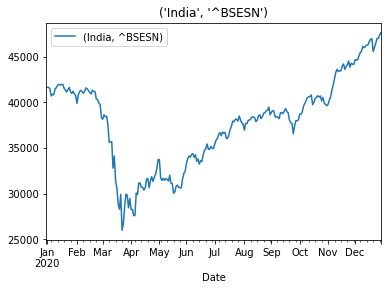

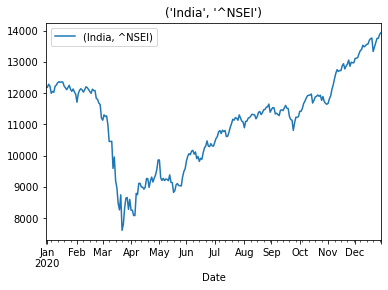

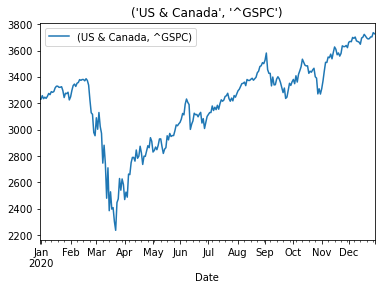

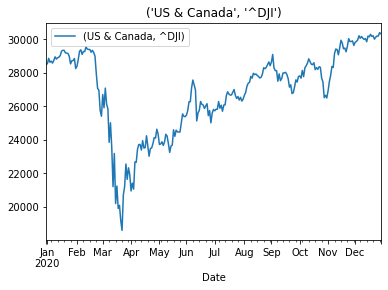

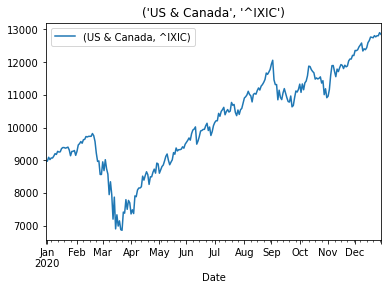

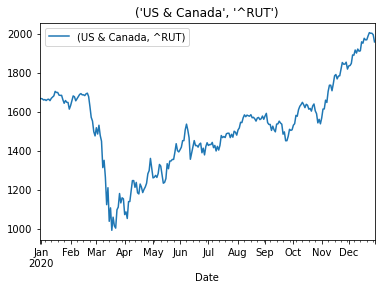

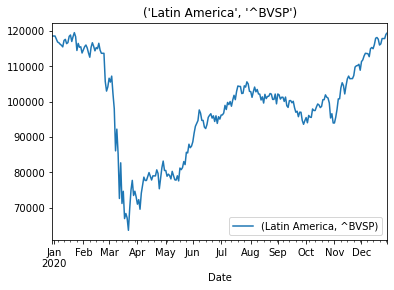

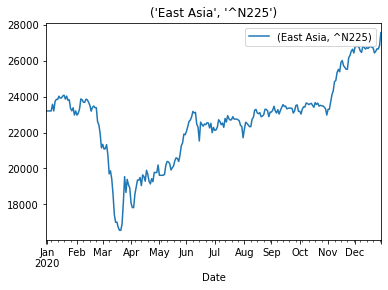

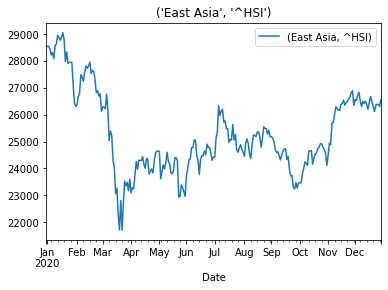

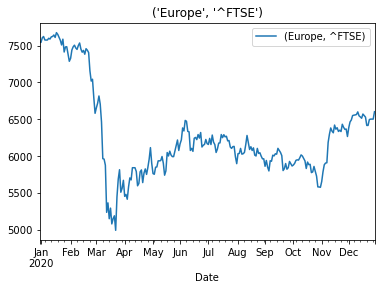

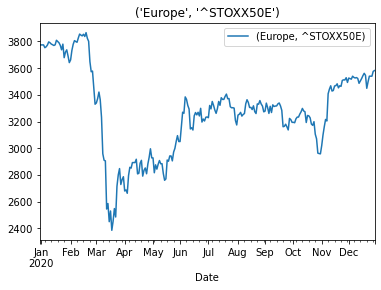

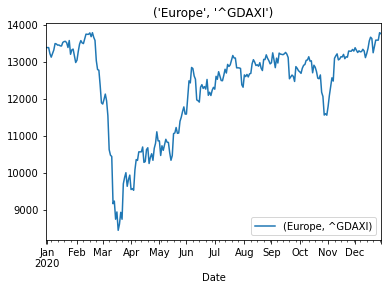

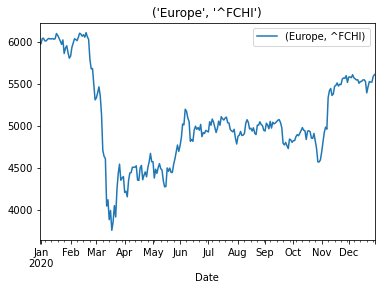

In [154]:
import matplotlib.pyplot as plt

for x in data.columns:
 data[x].plot(title = str(x))
 plt.legend()
 plt.show()



### Correlation Chart

In [155]:
corrMap=data.corr()

In [157]:
corrMap.style.background_gradient()